In [1]:
import torch
print(torch.__version__)

device = torch.accelerator.current_accelerator() if torch.accelerator.is_available() else torch.device("cpu")
print(f"Torch device: {device}")
if torch.cuda.is_available():
    for device_id in range(torch.cuda.device_count()):
        print(f"Found CUDA device: cuda:{device_id} - {torch.cuda.get_device_name(device_id)}")

2.8.0+rocm7.1.0.git7a520360
Torch device: cuda
Found CUDA device: cuda:0 - AMD Radeon AI PRO R9700
Found CUDA device: cuda:1 - AMD Radeon AI PRO R9700


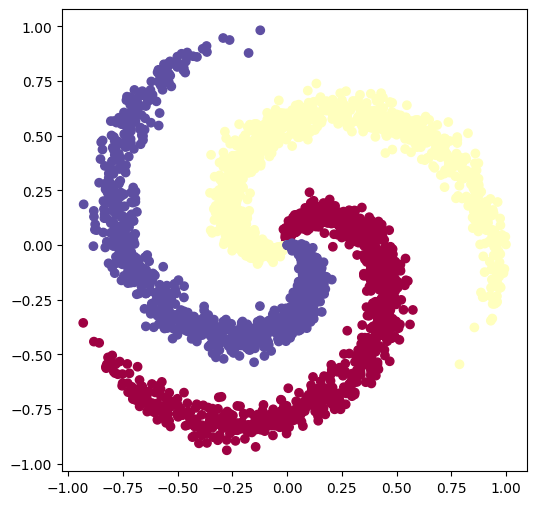

In [4]:
import numpy as np
import matplotlib.pyplot as plt

NUM_CLASSES = 3
NUM_FEATURES = 2
NUM_SAMPLES = 1000
RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
X = np.zeros((NUM_SAMPLES*NUM_CLASSES,NUM_FEATURES)) # data matrix (each row = single example)
y = np.zeros(NUM_SAMPLES*NUM_CLASSES, dtype='uint8') # class labels
for j in range(NUM_CLASSES):
    ix = range(NUM_SAMPLES*j,NUM_SAMPLES*(j+1))
    r = np.linspace(0.0,1,NUM_SAMPLES) # radius
    t = np.linspace(j*4,(j+1)*4,NUM_SAMPLES) + np.random.randn(NUM_SAMPLES)*0.2 # theta
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.long)

# lets visualize the data
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
plt.show()
